In [1]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using DataFrames
using StatsPlots

In [8]:
using Newtrinos
using Newtrinos.osc

In [12]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)
atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

LoadError: UndefVarError: `NND` not defined in `Newtrinos.osc`
Suggestion: check for spelling errors or missing imports.

In [11]:
experiments = (
 
    dayabay = Newtrinos.dayabay.configure(physics),
);

LoadError: UndefVarError: `physics` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
p = Newtrinos.get_params(experiments)

(Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

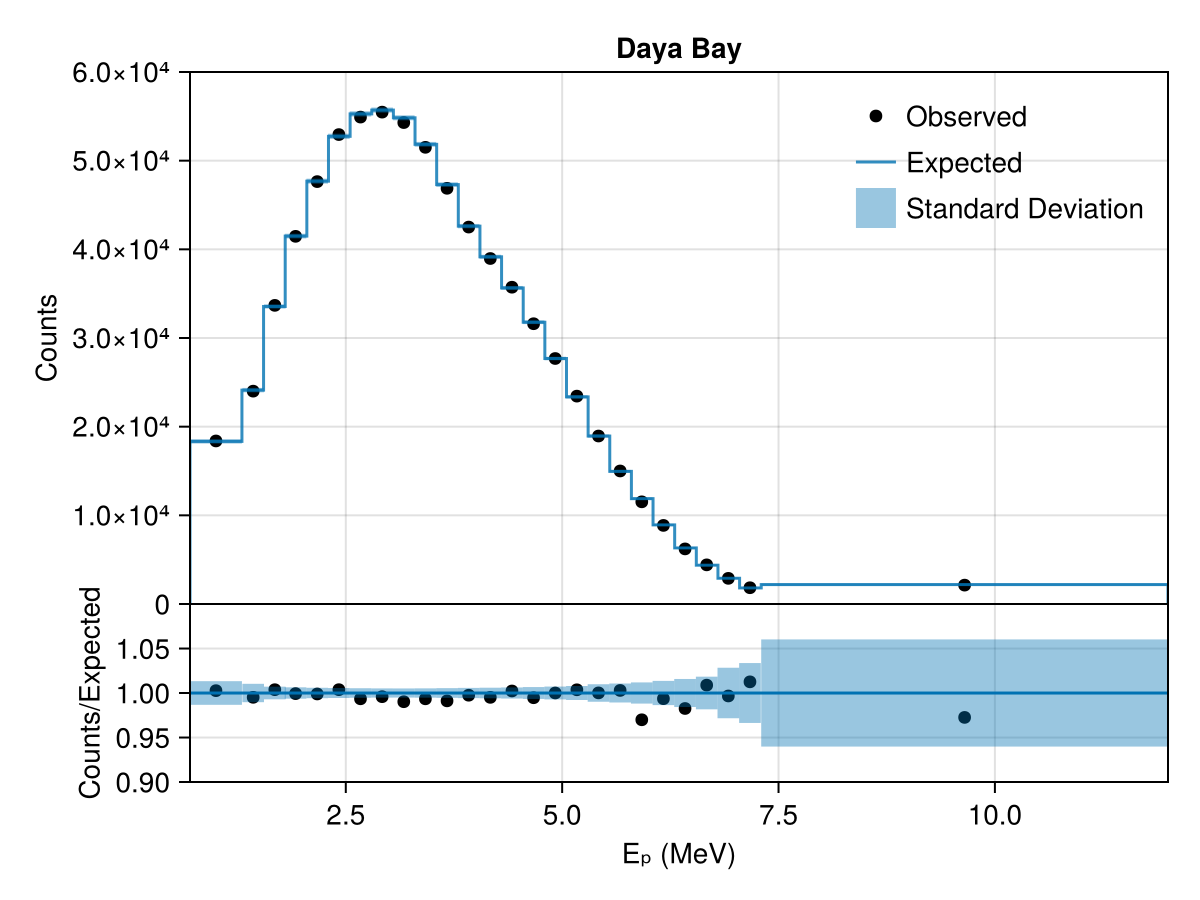

In [ ]:
img = experiments.dayabay.plot(p)
display("image/png", img)


In [ ]:
likelihood = Newtrinos.generate_likelihood(experiments);
result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


NewtrinosResult((θ₁₃ = [0.1, 0.10333333333333333, 0.10666666666666667, 0.11000000000000001, 0.11333333333333334, 0.11666666666666667, 0.12000000000000001, 0.12333333333333334, 0.12666666666666668, 0.13  …  0.16999999999999998, 0.17333333333333334, 0.1766666666666667, 0.18000000000000002, 0.18333333333333335, 0.18666666666666668, 0.19, 0.19333333333333336, 0.19666666666666668, 0.2], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], δCP = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], θ₁₂ = [0.

In [ ]:
using CairoMakie

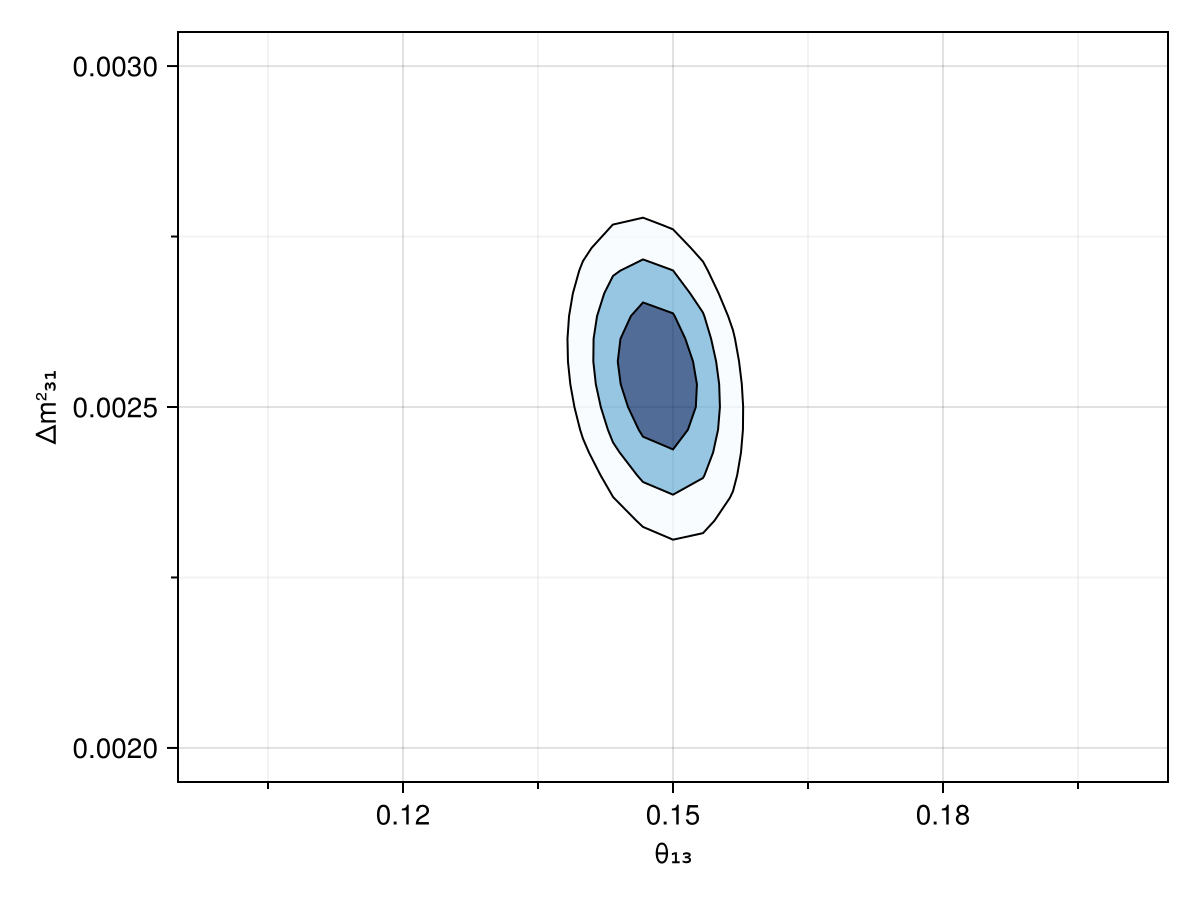

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)